In [ ]:
import torch

- x는 입력이고 w1은 입력층-은닉층을 연결하는 가중치
- b1은 입력층-은닉층을 연결하는 바이어스
- w2는 은닉층-출력층을 연결하는 가중치
- b2는 은닉층-출력층을 연결하는 바이어스

### 1. 피드포워드 뉴럴네트워크 계산 예시 (1)

In [ ]:
x = torch.tensor([2,1])
w1 = torch.tensor([[3,2,-4],[2,-3,1]])
b1 = 1
w2 = torch.tensor([[-1, 1], [1,2], [3,1]])
b2 = -1

### 2. 코드2는 실제 계산을 수행하는 코드
- 입력 x와 w1를 행렬곱한 뒤 b1을 더한 것이 h_preact입니다.
- 여기에 ReLU를 취해 은닉층 h를 만듭니다.
- 마지막으로 h와 w2를 행렬곱한 뒤 b2를 더해 출력층 y를 계산합니다.

In [ ]:
h_preact = torch.matmul(x, w1) + b1
h = torch.nn.functional.relu(h_preact)
y = torch.matmul(h, w2) + b2

In [ ]:
# 실행결과 확인
h_preact, h, y

(tensor([ 9,  2, -6]), tensor([9, 2, 0]), tensor([-8, 12]))

- 피드포워드 뉴럴네트워크의 학습 대상은 가중치와 바이어스입니다.
- 코드 예시에서는 w1, b1, w2, b2가 학습 대상이 됩니다.
- 이들은 태스크(예: 기계 번역)를 가장 잘 수행하는 방향으로 학습 과정에서 업데이트됩니다.



```
 트랜스포머에서는 은닉층의 뉴런 갯수(즉 은닉층의 차원수)를 입력층의 네 배로 설정
```



## Add: 잔차 연결
- 트랜스포머 블록의 Add는 잔차 연결(residual connection)을 가리킵니다. 잔차 연결이란 그림11처럼 블록(block) 계산을 건너뛰는 경로를 하나 두는 것을 말합니다.
-  입력을  𝐱, 이번 계산 대상 블록을 𝔽 라고 할 때 잔차 연결은  𝔽(𝐱)+𝐱 로 간단히 실현합니다.

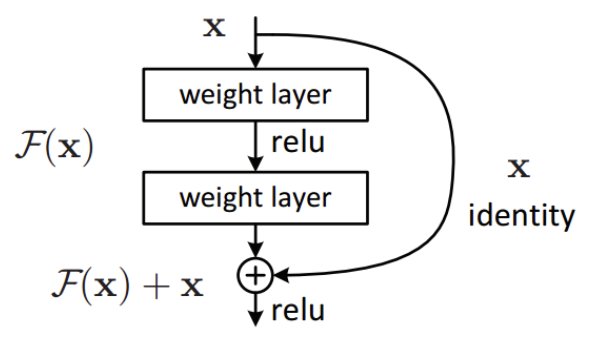

- 동일한 블록 계산이 계속될 때 잔차 연결을 두는 것은 제법 큰 효과가 있습니다.
- 위의 그림의 좌측처럼 블록 연산을 세 번 수행하고 블록과 블록 사이에 잔차 연결을 모두 적용했다고 가정해 봅시다.
- 그렇다면 모델은 사실상 그림의 우측처럼 계산하는 형태가 됩니다.

- 우측을 보면 잔차 연결을 두지 않았을 때는  𝑓1,  𝑓2,  𝑓3 을 연속으로 수행하는 경로 한 가지만 존재하였으나
- 잔차 연결을 블록마다 설정해둠으로써 모두 8가지의 새로운 경로가 생겼습니다.
- 다시 말해 모델이 다양한 관점에서 블록 계산을 수행하게 된다는 이야기입니다.

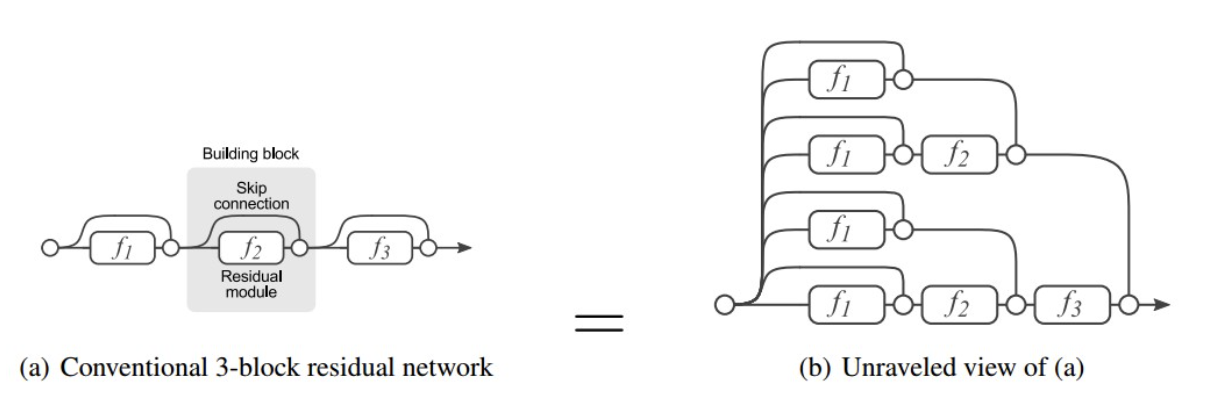

- 딥러닝 모델은 레이어가 많아지면 학습이 어려운 경향이 있습니다.
- 모델을 업데이트하기 위한 신호(그래디언트)가 전달되는 경로가 길어지기 때문입니다.
- 잔차 연결은 모델 중간에 블록을 건너뛰는 경로를 설정함으로써 학습을 용이하게 하는 효과까지 거둘 수 있습니다.



## Norm : 레이어 정규화
- 미니 배치의 인스턴스( 𝐱
 )별로 평균을 빼주고 표준편차로 나눠줘 정규화(normalization)을 수행하는 기법
 - 레이어 정규화를 수행하면 학습이 안정되고 그 속도가 빨라지는 등의 효과가 있음

 - 수식2에서  𝛽와  𝛾는 학습 과정에서 업데이트되는 가중치이며,  𝜖은 분모가 0이 되는 걸 방지하기 위해 더해주는 고정 값(보통 1e-5로 설정)

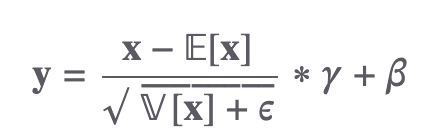

- 레이어 정규화는 미니배치의 인스턴스별로 수행합니다.
- 위의 그림은 배치 크기가 3인 경우 레이어 정규화 수행 과정의 일부를 나타낸 그림입니다.
- 배치의 첫번째 데이터( 𝐱=[1,2,3])의 평균( 𝔼[𝐱]
)과 표준편차( 𝕍[𝐱]‾‾‾‾‾√)는 각각 2, 0.8164인데요. 이 값들을 바탕으로 수식을 계산하게 됩니다.

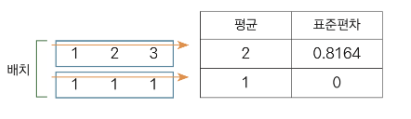

- 코드로도 확인해보겠습니다. 위 코드는 Pytorch로 레이어 정규화를 수행하는 역할을 합니다.
- 입력(input)의 모양은 배치 크기(2) × 피처의 차원수(3)가 되는데요.
`torch.nn.LayerNorm(input.shape[-1])`
- 이라는 말은 피처 대상으로 레이어 정규화를 수행한다는 의미가 됩니다.

In [ ]:
input = torch.tensor([[1.0, 2.0, 3.0], [1.0, 1.0, 1.0]])
m = torch.nn.LayerNorm(input.shape[-1])
output = m(input)

- 배치의 첫 번째 데이터를 수식에 따라 정규화하면 그 결과는 [-1.2247, 0.0, 1.2247]이 됩니다.
- 같은 방식으로 두번째 데이터를 정규화하면 [0.0, 0.0, 0.0]이 됩니다.

In [ ]:
# 실행결과 확인
output

tensor([[-1.2247,  0.0000,  1.2247],
        [ 0.0000,  0.0000,  0.0000]], grad_fn=<NativeLayerNormBackward0>)



```
>>> output
tensor([[-1.2247,  0.0000,  1.2247],
        [ 0.0000,  0.0000,  0.0000]], grad_fn=<NativeLayerNormBackward>)
```



- 래이어 정규화 수식을 보면 평균을 빼주고 표준편차로 나눠준 결과에  𝛾 를 곱하고 마지막으로 𝛽 를 더해주는 걸 알 수 있습니다.



```
>>> m.weight
Parameter containing:
tensor([1., 1., 1.], requires_grad=True)
>>> m.bias
Parameter containing:
tensor([0., 0., 0.], requires_grad=True)
```



- m.weight는  𝛾, m.bias는  𝛽에 대응하는데요.
- 파이토치의 LayerNorm 객체는 이 두 값을 각각 1과 0으로 초기화합니다.
- 다시 말해 학습 초기 레이어 정규화 수행은 배치 인스턴스의 평균을 빼주고 표준편차로 나눠준 결과에 1을 곱하고 마지막으로 0을 더해준다는 이야기입니다.
- 이후 학습 과정에서는 태스크(예: 기계번역)를 가장 잘 수행하는 방향으로 이 값들을 업데이트합니다.

## 모델 학습 기법
### Dropout - 이러한 과적합 현상을 방지하고자 뉴런의 일부를 확률적으로 0으로 대치하여 계산에서 제외하는 기법
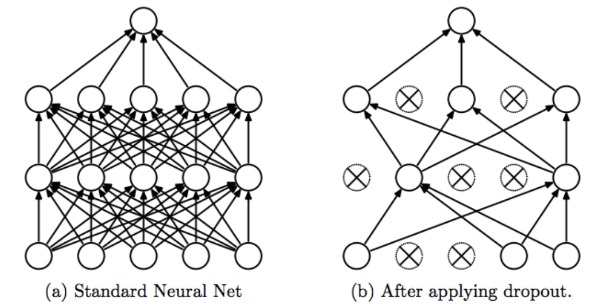

- `torch.nn.Dropout` 객체는 뉴런별로 드롭아웃을 수행할지 말지를 확률적으로 결정하는 함수인데요.
- p=0.2라는 말은 드롭아웃 수행 비율이 평균적으로 20%가 되게끔 하겠다는 이야기입니다.

In [ ]:
m = torch.nn.Dropout(p=0.2)
input = torch.randn(1, 10)
output = m(input)

In [ ]:
# 실행결과 확인
input, output

(tensor([[ 0.2692,  0.8932,  0.9608, -0.0701, -1.0871, -0.5056,  0.8361,  0.6832,
          -0.6426, -0.8382]]),
 tensor([[ 0.3364,  1.1165,  0.0000, -0.0877, -1.3589, -0.6320,  1.0451,  0.0000,
          -0.8033, -1.0478]]))

- torch.nn.Dropout은 안정적인 학습을 위해 각 요솟값에  1/(1−𝑝) 를 곱하는 역할도 수행
- p = 0.2로 설정해놓았으므로, 드롭아웃 적용으로 살아남은 요솟값 각각에 1.25를 곱하는 셈
- 트랜스포머 모델에서 드롭아웃은 입력 임베딩과 최초 블록 사이, 블록과 블록 사이, 마지막 블록과 출력층 사이 등에 적용합니다.
- 드롭아웃 비율은 10%(p=0.1)로 설정하는 것이 일반적입니다.
- 드롭아웃은 학습 과정에만 적용하고, 학습이 끝나고 나서 인퍼런스 과정에서는 적용하지 않습니다.

### Adam Optimizer
- 딥러닝 모델 학습은 모델 출력과 정답 사이의 오차(error)를 최소화하는 방향을 구하고 이 방향에 맞춰 모델 전체의 파라미터(parameter)들을 업데이트하는 과정입니다.
- 이때 오차를 손실(loss), 오차를 최소화하는 방향을 그래디언트(gradient)라고 합니다.
- 오차를 최소화하는 과정을 최적화(optimization)라고 합니다.
- 일단, 딥러닝 모델을 학습하려면 우선 오차부터 구해야 합니다. 오차를 구하려면 현재 시점의 모델에 입력을 넣어봐서 처음부터 끝까지 계산해보고 정답과 비교해야 합니다.
- 오차를 구하기 위해서, 모델 처음부터 끝까지 순서대로 계산하는 과정을 순전파(forward propagation)이라고 한다.
- 오차를 구하고, 오차를 최소화 하는 그래디언트를 구하려면 순전파의 역순으로 미분하여 계산 합니다. 이를 역전파 라고 합니다.


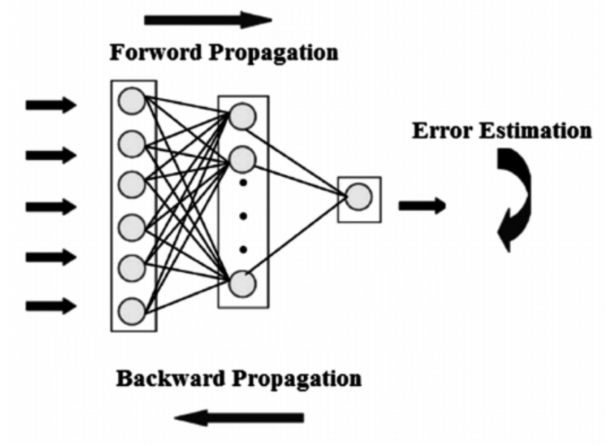

- 아담 옵티마이저의 핵심 동작 원리는 방향과 보폭을 적절하게 정해주는 겁니다.
- 방향을 정할 때는 현재 위치에서 가장 경사가 급한 쪽으로 내려가되, 여태까지 내려오던 관성(방향)을 일부 유지하도록 합니다.
- 보폭의 경우 안가본 곳은 성큼 빠르게 걸어 훑고 많이 가본 곳은 갈수록 보폭을 줄여 세밀하게 탐색하는 방식으로 정합니다.

In [ ]:
# 아담 옵티마이저를 사용하는 파이토치 코드입니다.
# 최초의 보폭(러닝 레이트, learning rate)를 정해주면 아담 옵티마이저가 최적화 대상 가중치들(model.parameters())에 방향과 보폭을 정해줍니다.

import torch
from torch.optim import Adam

# 모델 인스턴스 생성
model = YourModel()

# 옵티마이저 정의
optimizer = Adam(model.parameters(), lr=your_learning_rate)

# 어떻게 작성하는지 보여주는 예시라 코드 작동 안합니다. 실행하면 오류나요^^

NameError: name 'Conv2DTranspose' is not defined